## Input 
- recipe_train.csv
- recipe_test.csv
- countvectorizer 
    - train * 3 (name, step, ingredient)
    - vocabs collections
    - => countVectoriser, could use some methods to preprocess
- vec
    - train + test (name, step, ingredient)
    - sparse matrix / dense matrix?
- doc2vec50
    - train + test (name, step, ingredient)
    - have 50 feature
- doc2vec100
    - have 100 feature
    



## Import Library

In [1]:
%matplotlib inline

# Data Loading
import pandas as pd
import numpy as np
import scipy
import pickle

# Visualisation 
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from sklearn.feature_selection import mutual_info_classif

# Natural Language Processing
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Model Selection
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

# Evaluation
from sklearn.metrics import accuracy_score

# Utility
np.random.seed(500)
from collections import defaultdict
from scipy.sparse import hstack

## Load Data

## Variable

ntrain: train after split
train: orginal training set

#### ntrain set's text features
train_corpus_name
train_corpus_steps
train_corpus_ingr

#### validation set's text features
test_corpus_name = X_test['name']
test_corpus_steps = X_test['steps']
test_corpus_ingr = X_test['ingredients']

#### train set's text features
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_ingr_vec = scipy.sparse.load_npz('train_ingr_vec.npz')
train_steps_vec = scipy.sparse.load_npz('train_steps_vec.npz')

####  ntrain set's countvectorizer
vocab_name = CountVectorizer(stop_words='english').fit(train_corpus_name)
vocab_ingr = CountVectorizer(stop_words='english').fit(train_corpus_ingr)
vocab_steps = CountVectorizer(stop_words='english').fit(train_corpus_steps)

#### ntrain sparse matrix
x_train_sm_name = vocab_name.transform(train_corpus_name)
x_train_sm_ingr = vocab_ingr.transform(train_corpus_ingr)
x_train_sm_steps = vocab_steps.transform(train_corpus_steps)

#### ntrain sparse matrix for all text features
x_train_sm_text = hstack((x_train_sm_name, x_train_sm_ingr, x_train_sm_steps))

#### preprocessed ntrain sparse matrix and countvectorizers
vocab_name_cv = new_countvectorizer().fit(train_corpus_name)
vocab_steps_cv = new_countvectorizer().fit(train_corpus_steps)
vocab_ingr_cv = new_countvectorizer().fit(train_corpus_ingr)

train_sm_name_pre = vocab_name_cv.transform(train_corpus_name)
train_sm_steps_pre = vocab_steps_cv.transform(train_corpus_steps)
train_sm_ingr_pre = vocab_ingr_cv.transform(train_corpus_ingr)

### use train cv fit test
test_name_sm = vocab_name_cv.transform(test_corpus_name)
test_steps_sm = vocab_steps_cv.transform(test_corpus_steps)
test_ingr_sm = vocab_ingr_cv.transform(test_corpus_ingr)


In [38]:
train = pd.read_csv('recipe_train.csv')

# Independent and Dependent Features
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_numeric = X.iloc[:,1:3].values

# train validation split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=88)

# Individual Numeric Features
n_steps = pd.DataFrame(train["n_steps"])
n_ingr = pd.DataFrame(train["n_ingredients"])

# Individual Text Features [Train & Test]
train_corpus_name = X_train['name']
train_corpus_steps = X_train['steps']
train_corpus_ingr = X_train['ingredients']

test_corpus_name = X_test['name']
test_corpus_steps = X_test['steps']
test_corpus_ingr = X_test['ingredients']

# sparse matrix for textual features
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_ingr_vec = scipy.sparse.load_npz('train_ingr_vec.npz')
train_steps_vec = scipy.sparse.load_npz('train_steps_vec.npz')

In [3]:
# test_set = pd.read_csv('recipe_test.csv')
# test_data = test_set.iloc[:, :-1].values
# test_label = test_set.iloc[:, -1].values

# Visualisation

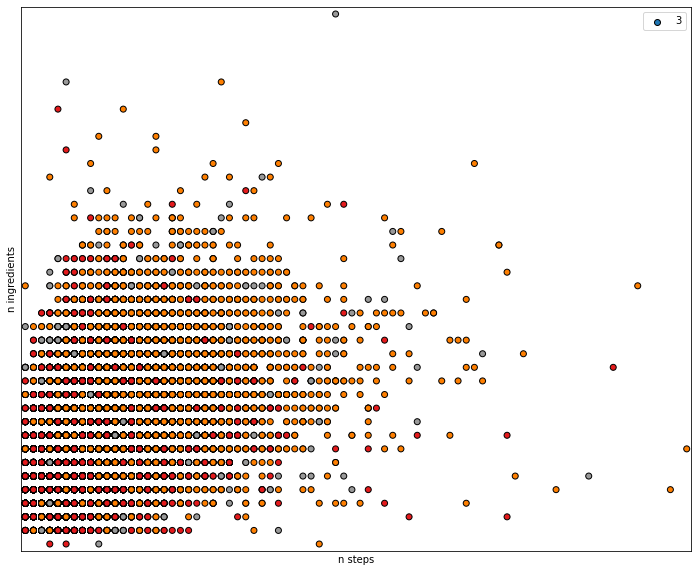

In [218]:
# Scatter Plot
# Plot the training points
x_min, x_max = X_numeric[:, 0].min() - .5, X_numeric[:, 0].max() + .5
y_min, y_max = X_numeric[:, 1].min() - .5, X_numeric[:, 1].max() + .5



# Plot the training points
plt.figure(figsize=(12, 10))
plt.scatter(X_numeric[:,0], X_numeric[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('n steps')
plt.ylabel('n ingredients')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.legend("3")
plt.show()

## Data Distribution Identification

#### Distribution of n_steps and n_ingredients

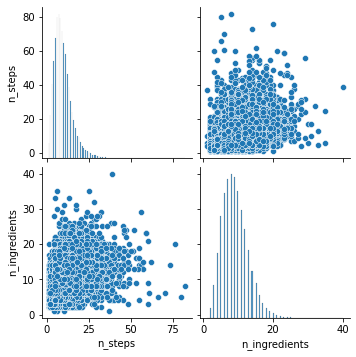

In [47]:
sns.pairplot(X)

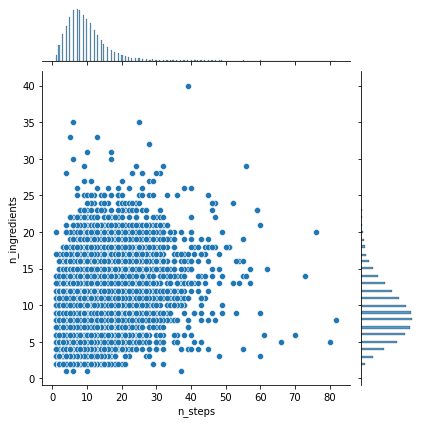

In [46]:
sns.jointplot(data=X, x="n_steps", y="n_ingredients")

In [45]:
rho = np.corrcoef(X.iloc[:,1], X.iloc[:,2])
print('n_steps and n_ingredients pearson correlation is',rho[0][1])
mi2_lst = mutual_info_classif(X_numeric, y, discrete_features=True)
print('Mutual information between n_steps and class label is:',mi2_lst[0])
print('Mutual information between n_ingredients and class label is:',mi2_lst[1])

n_steps and n_ingredients pearson correlation is 0.4096026488933777
Mutual information between n_steps and class label is: 0.07484770354524196
Mutual information between n_ingredients and class label is: 0.05331660824490941


count    40000.000000
mean         9.705025
std          5.748442
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         82.000000
Name: n_steps, dtype: float64
count    40000.00000
mean         9.09970
std          3.66157
min          1.00000
25%          6.00000
50%          9.00000
75%         11.00000
max         40.00000
Name: n_ingredients, dtype: float64
There are 1527 outliers for n_steps, they are
[]
[24, 28, 24, 22, 25, 25, 24, 32, 26, 27, 26, 29, 22, 26, 28, 25, 22, 29, 45, 33, 27, 24, 26, 26, 23, 22, 26, 24, 28, 26, 27, 24, 26, 24, 22, 30, 29, 22, 35, 37, 22, 31, 30, 39, 23, 22, 24, 36, 22, 43, 43, 25, 23, 24, 40, 22, 26, 27, 26, 32, 60, 22, 27, 29, 39, 33, 22, 34, 29, 26, 24, 29, 23, 22, 28, 24, 35, 22, 24, 25, 23, 22, 22, 24, 25, 53, 39, 25, 25, 27, 34, 26, 29, 24, 28, 22, 22, 26, 44, 25, 24, 37, 27, 25, 22, 28, 38, 24, 39, 32, 31, 25, 28, 23, 22, 23, 29, 22, 23, 41, 25, 29, 27, 22, 22, 22, 22, 26, 33, 27, 24, 25, 23, 31, 24, 

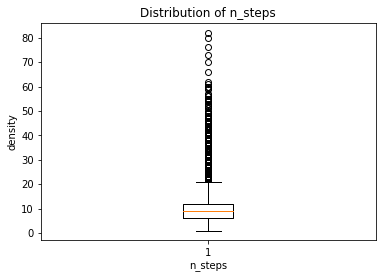

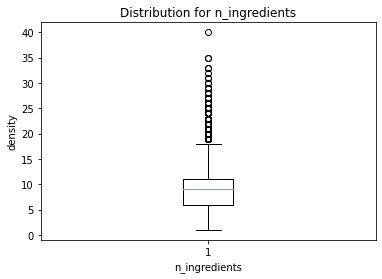

In [230]:
#### Check Outliers ###

#### OUTLIERS FOR NUMERICAL ###
print(X.iloc[:,1].describe())
print(X.iloc[:,2].describe())

nsteps = X.iloc[:,1].values
ningre = X.iloc[:,2].values
print('There are %d outliers for n_steps, they are' %(len([i for i in nsteps if i < (6 - 1.5 * 6)])+len([i for i in nsteps if i > (12 + 1.5 * 6)])))
print([i for i in nsteps if i < (6 - 1.5 * 6)])
print([i for i in nsteps if i > (12 + 1.5 * 6)])
print('\n')
print('There are %d outliers for n_ingredients, they are' %(len([i for i in ningre if i < (6 - 1.5 * 6)])+len([i for i in ningre if i > (12 + 1.5 * 6)])))
print([i for i in ningre if i < (6 - 1.5 * 5)])
print([i for i in ningre if i > (11 + 1.5 * 5)])

## boxplot
plt.figure()

plt.title('Distribution of n_steps')
plt.boxplot(x = X.iloc[:,1])
plt.xlabel("n_steps")
plt.ylabel("density")
plt.figure(2)
plt.title('Distribution for n_ingredients')
plt.boxplot(x = X.iloc[:,2])
plt.xlabel("n_ingredients")
plt.ylabel("density")
plt.show()


#### Distribution of class groups

In [43]:
### 2. Data is imbalanced!!! ---SVM
print('There are %d instances for class label 1.' %(len([i for i in y if i==1])))
print('There are %d instances for class label 2.' %(len([i for i in y if i==2])))
print('There are %d instances for class label 3.' %(len([i for i in y if i==3])))

There are 17705 instances for class label 1.
There are 20246 instances for class label 2.
There are 2049 instances for class label 3.


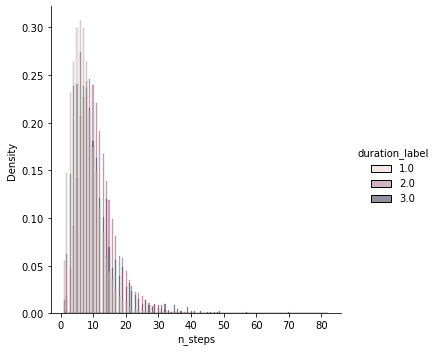

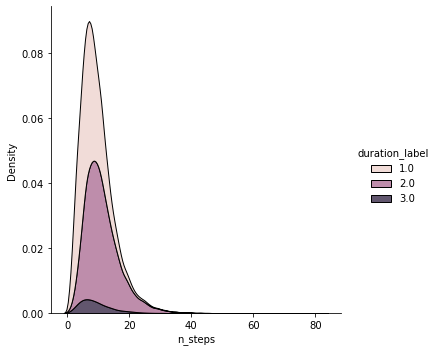

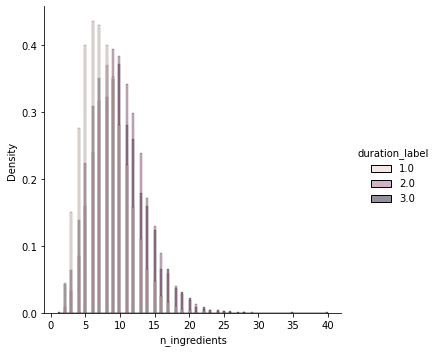

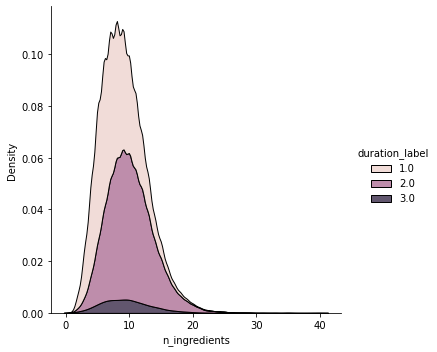

In [226]:
#data is unbanlanced, normalize each group
##n_steps
import matplotlib.cm as cm
sns.displot(X, x='n_steps', hue=y,stat="density",common_norm=False,color = cm.Accent)
###KDE estimation
sns.displot(X, x='n_steps', hue=y, kind="kde", multiple="stack")

##n_ingr
sns.displot(X, x='n_ingredients', hue=y,stat="density",common_norm=False,color = cm.Accent)
###KDE estimation
sns.displot(X, x='n_ingredients', hue=y, kind="kde", multiple="stack")

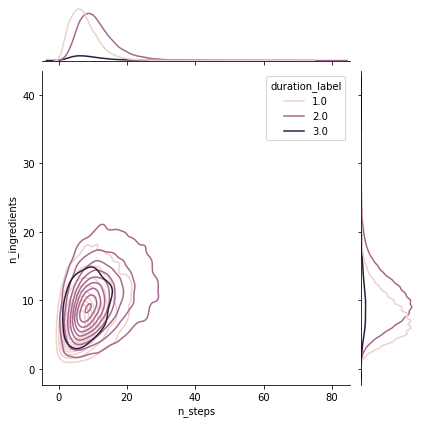

In [41]:
sns.jointplot(
    data=X,
    x="n_steps", y="n_ingredients", hue=y,
    kind="kde"
)

# Preprocessing

### Reproduce CountVectorizer

In [101]:
vocab_name = CountVectorizer(stop_words='english').fit(train_corpus_name)
vocab_ingr = CountVectorizer(stop_words='english').fit(train_corpus_ingr)
vocab_steps = CountVectorizer(stop_words='english').fit(train_corpus_steps)

#### ntrain sparse matrix
train_sm_name = vocab_name.transform(train_corpus_name)
train_sm_ingr = vocab_ingr.transform(train_corpus_ingr)
train_sm_steps = vocab_steps.transform(train_corpus_steps)


train_name_list = list(vocab_name.vocabulary_)
print(train_sm_name.shape)

train_ingr_list = list(vocab_ingr.vocabulary_)
print(train_sm_ingr.shape)

train_steps_list = list(vocab_steps.vocabulary_)
print(train_sm_steps.shape)

#### ntrain sparse matrix for all text features
train_sm_text = hstack((train_sm_name, train_sm_steps, train_sm_ingr))


(26800, 8767)
(26800, 2672)
(26800, 14953)


In [102]:
## test sparse matrix
test_sm_name = vocab_name.transform(test_corpus_name)
test_sm_ingr = vocab_ingr.transform(test_corpus_ingr)
test_sm_steps = vocab_steps.transform(test_corpus_steps)


### concatenate all test text features
test_sm_text = hstack((test_sm_name, test_sm_steps, test_sm_ingr))

In [103]:
print(test_sm_name.shape)
print(test_sm_ingr.shape)
print(test_sm_steps.shape)

(13200, 8767)
(13200, 2672)
(13200, 14953)


### New CountVectorizers for text features with more preprocessing

In [126]:
import re
from nltk.stem import PorterStemmer

# init stemmer
porter_stemmer = PorterStemmer()



# Non-Alphetic + Stemmatisation
def text_preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," _connector_ ",text) # normalize certain words
    
    # stem words
    words=re.split("\\s+",text)
#     stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)

In [183]:
print(train_sm_text.shape, test_sm_text.shape)

(26800, 26392) (13200, 26392)


In [135]:
def new_countvectorizer():
    return CountVectorizer(min_df=5,
                           max_df=0.95, 
#                            preprocessor = text_preprocessor,
                           stop_words = "english",
                           ngram_range=(1,3),
                           max_features=4000)



In [98]:
print(train_sm_steps.shape, test_sm_steps.shape)

(26800, 14953) (13200, 14953)


In [99]:
#### preprocessed ntrain sparse matrix and countvectorizers
# -------------------LONG------------------------
vocab_name_cv = new_countvectorizer().fit(train_corpus_name)
vocab_steps_cv = new_countvectorizer().fit(train_corpus_steps)
vocab_ingr_cv = new_countvectorizer().fit(train_corpus_ingr)

train_sm_name_pre = vocab_name_cv.transform(train_corpus_name)
train_sm_steps_pre = vocab_steps_cv.transform(train_corpus_steps)
train_sm_ingr_pre = vocab_ingr_cv.transform(train_corpus_ingr)

### use train cv fit test
test_sm_name_pre = vocab_name_cv.transform(test_corpus_name)
test_sm_steps_pre = vocab_steps_cv.transform(test_corpus_steps)
test_sm_ingr_pre = vocab_ingr_cv.transform(test_corpus_ingr)

In [100]:
print(train_name_cv.shape)
print(test_name_cv.shape)

train_sm_text_pre = hstack((train_sm_name_pre, train_sm_steps_pre, train_sm_ingr_pre))
test_sm_text_pre = hstack((test_sm_name_pre, test_sm_steps_pre, test_sm_ingr_pre))

print(text_train_cv.shape)
print(text_test_cv.shape)

(32000, 4000)
(8000, 4000)
(32000, 12000)
(8000, 12000)


### Tf-idf Vectorizer from non-preprocessed countvectorizer

In [104]:
def tfidf(X_train, X_test):
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True) 
    train_tfidf = tfidf_transformer.fit(X_train)
    X_train_tfidf = train_tfidf.transform(X_train)
    X_test_tfidf = train_tfidf.transform(X_test)
    return X_train_tfidf,X_test_tfidf

train_tfidf_name, test_tfidf_name = tfidf(train_sm_name, test_sm_name)
train_tfidf_steps, test_tfidf_steps = tfidf(train_sm_steps, test_sm_steps)
train_tfidf_ingr, test_tfidf_ingr = tfidf(train_sm_ingr, test_sm_ingr)

## combine all text 
train_tfidf_text = hstack((train_tfidf_name, train_tfidf_steps, train_tfidf_ingr))
test_tfidf_text = hstack((test_tfidf_name, test_tfidf_steps, test_tfidf_ingr))

In [108]:
print(train_tfidf_name.shape, train_tfidf_steps.shape, train_tfidf_ingr.shape)
print(test_tfidf_name.shape, test_tfidf_steps.shape, test_tfidf_ingr.shape)
print(train_tfidf_text.shape, test_tfidf_text.shape)


(26800, 8767) (26800, 14953) (26800, 2672)
(13200, 8767) (13200, 14953) (13200, 2672)
(26800, 26392) (13200, 26392)


### Tf-idf Vectorizer from preprocessed countvectorizer

In [112]:
# tf-idf scores for processed cv
train_tfidf_name_pre, test_tfidf_name_pre = tfidf(train_sm_name_pre, test_sm_name_pre)
train_tfidf_steps_pre, test_tfidf_steps_pre = tfidf(train_sm_steps_pre, test_sm_steps_pre)
train_tfidf_ingr_pre, test_tfidf_ingr_pre = tfidf(train_sm_ingr_pre, test_sm_ingr_pre)

## combine all text
train_tfidf_text_pre = hstack((train_tfidf_name_pre, train_tfidf_steps_pre, train_tfidf_ingr_pre))
test_tfidf_text_pre = hstack((test_tfidf_name_pre, test_tfidf_steps_pre, test_tfidf_ingr_pre))

In [113]:
print(train_tfidf_name_pre.shape, train_tfidf_steps_pre.shape, train_tfidf_ingr_pre.shape)
print(test_tfidf_name_pre.shape, test_tfidf_steps_pre.shape, test_tfidf_ingr_pre.shape)
print(train_tfidf_text_pre.shape, test_tfidf_text_pre.shape)

(26800, 4000) (26800, 4000) (26800, 4000)
(13200, 4000) (13200, 4000) (13200, 4000)
(26800, 12000) (13200, 12000)


### Manual Cross-validation

### Tf-Idf Preprocessed

In [136]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_train_tfidf_pre = []
cv_test_tfidf_pre = []
cv_train_tfidf_pre_labels = []
cv_test_tfidf_pre_labels = []

    
    
def cv_tfidf_pre(X, y):
    # enumerate the splits and summarize the distributions
    for (train_ix, test_ix) in kfold.split(X, y):
        train_X = X.loc[train_ix, :]
        test_X = X.loc[test_ix, :]
        train_y = y.loc[train_ix]
        test_y = y.loc[test_ix]

        train_corpus_name = train_X['name']
        train_corpus_steps = train_X['steps']
        train_corpus_ingr = train_X['ingredients']

        train_name_cv = new_countvectorizer()
        train_steps_cv = new_countvectorizer()
        train_ingr_cv = new_countvectorizer()
        
        
        train_sm_name = train_name_cv.fit_transform(train_corpus_name)
        train_sm_steps = train_steps_cv.fit_transform(train_corpus_steps)  
        train_sm_ingr = train_ingr_cv.fit_transform(train_corpus_ingr) 

        
        test_corpus_name = test_X['name']
        test_corpus_steps = test_X['steps']
        test_corpus_ingr = test_X['ingredients']

  
        test_sm_name = train_name_cv.transform(test_corpus_name)
        test_sm_steps = train_steps_cv.transform(test_corpus_steps) 
        test_sm_ingr = train_ingr_cv.transform(test_corpus_ingr) 


        train_tfidf_name, test_tfidf_name = tfidf(train_sm_name, test_sm_name)
        train_tfidf_steps, test_tfidf_steps = tfidf(train_sm_steps, test_sm_steps)
        train_tfidf_ingr, test_tfidf_ingr = tfidf(train_sm_ingr, test_sm_ingr)

        train_tfidf_all = hstack((train_tfidf_name, train_tfidf_steps, train_tfidf_ingr))   
        test_tfidf_all = hstack((test_tfidf_name, test_tfidf_steps, test_tfidf_ingr))  

        cv_train_tfidf_pre.append(train_tfidf_all)
        cv_test_tfidf_pre.append(test_tfidf_all)
        
        cv_train_tfidf_pre_labels.append(train_y)
        cv_test_tfidf_pre_labels.append(test_y)

        print("-------------------Finished Once!----------------------------") 

cv_tfidf_pre(X, y)

[    0     2     4 ... 39996 39997 39998]
-------------------Finished Once!----------------------------
[    0     1     2 ... 39997 39998 39999]
-------------------Finished Once!----------------------------
[    1     3     4 ... 39997 39998 39999]
-------------------Finished Once!----------------------------
[    0     1     2 ... 39995 39996 39999]
-------------------Finished Once!----------------------------
[    0     1     2 ... 39997 39998 39999]
-------------------Finished Once!----------------------------


### Tf-Idf Non-preprocessed

In [137]:


cv_train_tfidf = []
cv_test_tfidf = []
cv_train_tfidf_labels = []
cv_test_tfidf_labels = []


def cv_tfidf():
    # enumerate the splits and summarize the distributions
    for (train_ix, test_ix) in kfold.split(X, y):

        train_X = X.loc[train_ix, :]
        test_X = X.loc[test_ix, :]
        train_y = y.loc[train_ix]
        test_y = y.loc[test_ix]

        train_corpus_name = train_X['name']
        train_corpus_steps = train_X['steps']
        train_corpus_ingr = train_X['ingredients']

        vocab_name = CountVectorizer(stop_words='english').fit(train_corpus_name)
        vocab_steps = CountVectorizer(stop_words='english').fit(train_corpus_steps)
        vocab_ingr = CountVectorizer(stop_words='english').fit(train_corpus_ingr)
        
        train_sm_name = vocab_name.transform(train_corpus_name)
        train_sm_steps = vocab_steps.transform(train_corpus_steps)  
        train_sm_ingr = vocab_ingr.transform(train_corpus_ingr) 

        test_corpus_name = test_X['name']
        test_corpus_steps = test_X['steps']
        test_corpus_ingr = test_X['ingredients']

        test_sm_name = vocab_name.transform(test_corpus_name)
        test_sm_steps = vocab_steps.transform(test_corpus_steps) 
        test_sm_ingr = vocab_ingr.transform(test_corpus_ingr) 

        cv_train_tfidf_name, cv_test_tfidf_name = tfidf(train_sm_name, test_sm_name)
        cv_train_tfidf_steps, cv_test_tfidf_steps = tfidf(train_sm_steps, test_sm_steps)
        cv_train_tfidf_ingr, cv_test_tfidf_ingr = tfidf(train_sm_ingr, test_sm_ingr)

        cv_train_tfidf_all = hstack((cv_train_tfidf_name, cv_train_tfidf_steps, cv_train_tfidf_ingr))   
        cv_test_tfidf_all = hstack((cv_test_tfidf_name, cv_test_tfidf_steps, cv_test_tfidf_ingr))  

        cv_train_tfidf.append(cv_train_tfidf_all)
        cv_train_tfidf_labels.append(train_y)

        cv_test_tfidf.append(cv_test_tfidf_all)
        cv_test_tfidf_labels.append(test_y)

        print("-------------------Finished Once!----------------------------") 

        
cv_tfidf()

-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------


### Preprocessed Countvectoriser

In [139]:
cv_train_countvec_pre = []
cv_test_countvec_pre = []
cv_train_countvec_pre_labels = []
cv_test_countvec_pre_labels = []

def cv_countvec_pre():
    # enumerate the splits and summarize the distributions
    for (train_ix, test_ix) in kfold.split(X, y):
        train_X = X.loc[train_ix, :]
        test_X = X.loc[test_ix, :]
        train_y = y.loc[train_ix]
        test_y = y.loc[test_ix]

        train_corpus_name = train_X['name']
        train_corpus_steps = train_X['steps']
        train_corpus_ingr = train_X['ingredients']

        train_name_cv = new_countvectorizer()
        train_sm_name = train_name_cv.fit_transform(train_corpus_name)

        train_steps_cv = new_countvectorizer()
        train_sm_steps = train_steps_cv.fit_transform(train_corpus_steps)  

        train_ingr_cv = new_countvectorizer()
        train_sm_ingr = train_ingr_cv.fit_transform(train_corpus_ingr) 


        test_corpus_name = test_X['name']
        test_corpus_steps = test_X['steps']
        test_corpus_ingr = test_X['ingredients']

        test_sm_name = train_name_cv.transform(test_corpus_name)
        test_sm_steps = train_steps_cv.transform(test_corpus_steps) 
        test_sm_ingr = train_ingr_cv.transform(test_corpus_ingr) 

        cv_train_all = hstack((train_sm_name, train_sm_steps, train_sm_ingr))   
        cv_test_all = hstack((test_sm_name, test_sm_steps, test_sm_ingr))  

        cv_train_countvec_pre.append(cv_train_all)
        cv_train_countvec_pre_labels.append(train_y)

        cv_test_countvec_pre.append(cv_test_all)
        cv_test_countvec_pre_labels.append(test_y)

        print("-------------------Finished Once!----------------------------") 

cv_countvec_pre()

-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------
-------------------Finished Once!----------------------------


## Evaluation 

### Micro 

In [140]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

def evaluation_model_micro(model, train_countVecs, test_countVecs, train_labels, test_labels):
    f1_arr = []
    precision_arr = []
    recall_arr = []
    for i in range(5):
        print('The', i+1, 'round!')
        X_train = train_countVecs[i]
        X_test = test_countVecs[i]
        y_train = train_labels[i]
        y_test = test_labels[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average="micro")
        f1_arr.append(f1)
        print('F1 score is',f1)
        precision = precision_score(y_test, y_pred, average="micro")
        precision_arr.append(precision)
        print('Precision is',precision)
        recall = recall_score(y_test, y_pred, average="micro")
        recall_arr.append(recall)
        print('Recall is',recall)
        print('Confusion matrix is\n')
        print(confusion_matrix(y_test, y_pred))
        print('Classification report is\n')
        print(classification_report(y_test, y_pred))
    print('\nMean precision is', sum(precision_arr)/len(precision_arr))
    print('Mean recall is', sum(recall_arr)/len(recall_arr))
    print('Mean F1 is', sum(f1_arr)/len(f1_arr))

### Macro

In [141]:
def evaluation_model_macro(model, train_countVecs, test_countVecs, train_labels, test_labels):
    f1_arr = []
    precision_arr = []
    recall_arr = []
    for i in range(5):
        print('The', i+1, 'round!')
        X_train = train_countVecs[i]
        X_test = test_countVecs[i]
        y_train = train_labels[i]
        y_test = test_labels[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average="macro")
        f1_arr.append(f1)
        print('F1 score is',f1)
        precision = precision_score(y_test, y_pred, average="macro")
        precision_arr.append(precision)
        print('Precision is',precision)
        recall = recall_score(y_test, y_pred, average="macro")
        recall_arr.append(recall)
        print('Recall is',recall)
        print('Confusion matrix is\n')
        print(confusion_matrix(y_test, y_pred))
        print('Classification report is\n')
        print(classification_report(y_test, y_pred))
    print('\nMean precision is', sum(precision_arr)/len(precision_arr))
    print('Mean recall is', sum(recall_arr)/len(recall_arr))
    print('Mean F1 is', sum(f1_arr)/len(f1_arr))

## Feature Selection

### 1. Mutual Information 

In [142]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

def chi2_kbest(a, b, step_size, models, titles, X_train, y_train, X_test, y_test):
    ### grid search for best K
    output = []
    for K in range(a,b,step_size):
        print('k is', K)
        x2 = SelectKBest(chi2,k=K)
        ### preprocessed count
        X_train_chi = x2.fit_transform(X_train,y_train)
        X_test_chi = x2.transform(X_test)
        
        ### if there is only a model to be tested
        if len(models)==1:
            models[0].fit(X_train_chi.toarray(),y_train)
            acc = models[0].score(X_test_chi.toarray(), y_test)
            print(titles[0], "Accuracy:",acc, '\n')
            output.append(acc)
            
        ##else iterate each model to be tested
        else:
            for title, model in zip(titles, models):
                model.fit(X_train_chi.toarray(),y_train)
                acc = model.score(X_test_chi.toarray(), y_test)
                print(title, "Accuracy:",acc, '\n')
                output.append(acc)
    return output

### 2. Chi2

In [143]:
def mi_kbest(a, b, step_size, models, titles, X_train, y_train, X_test, y_test):
    ### grid search for best K
    output = []
    for K in range(a,b,step_size):
        print('k is', K)
        mi = SelectKBest(score_func=mutual_info_classif,k=K)
        ### preprocessed count
        X_train_mi = mi.fit_transform(X_train,y_train)
        X_test_mi = mi.transform(X_test)
        
        ### if there is only a model to be tested
        if len(models)==1:
            models[0].fit(X_train_mi.toarray(),y_train)
            acc = models[0].score(X_test_mi.toarray(), y_test)
            print(titles[0], "Accuracy:",acc, '\n')
            output.append(acc)
        
        else:
            for title, model in zip(titles, models):
                model.fit(X_train_mi.toarray(),y_train)
                acc = model.score(X_test_mi.toarray(), y_test)
                print(title, "Accuracy:",acc, '\n')
                output.append(acc)
    return output

## Train




### 0.Base classifier

In [144]:
### 0R make comparison
from sklearn.dummy import DummyClassifier
zero_r = DummyClassifier(strategy='most_frequent')
zero_r.fit(x_train_text, y_train)
#ybar = zero_r.predict(x_train_text)
print(zero_r.score(x_test_text, y_test))

0.5096212121212121


###  1. Naive Bayes

In [145]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB,CategoricalNB,ComplementNB

##tfidf preprocessed
models=[BernoulliNB(),
        MultinomialNB(),
        ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
         'MultinomialNB',
         'ComplementNB']

for title, model in zip(titles, models):
    model.fit(train_tfidf_text_pre.toarray(),y_train)
    acc = model.score(test_tfidf_text_pre.toarray(), y_test)
    print(title, "Accuracy:",acc)

BernoulliNB Accuracy: 0.7256060606060606
MultinomialNB Accuracy: 0.7417424242424242
ComplementNB Accuracy: 0.7346969696969697


In [150]:
## tfidf non-preprocessed 
models=[BernoulliNB(),
        MultinomialNB(),
        ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
         'MultinomialNB',
         'ComplementNB']

for title, model in zip(titles, models):
    model.fit(train_tfidf_text.toarray(),y_train)
    acc = model.score(test_tfidf_text.toarray(), y_test)
    print(title, "Accuracy:",acc)


BernoulliNB Accuracy: 0.7516666666666667
MultinomialNB Accuracy: 0.7099242424242425
ComplementNB Accuracy: 0.7254545454545455


In [151]:
## preprocessed after mi selection

models=[BernoulliNB(),
        MultinomialNB(),
        ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
            'MultinomialNB',
            'ComplementNB']

mi_kbest(1000, 2100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)


k is 1000
BernoulliNB Accuracy: 0.7346212121212121 

MultinomialNB Accuracy: 0.7073484848484849 

ComplementNB Accuracy: 0.708939393939394 

k is 1100
BernoulliNB Accuracy: 0.734469696969697 

MultinomialNB Accuracy: 0.708030303030303 

ComplementNB Accuracy: 0.7088636363636364 

k is 1200
BernoulliNB Accuracy: 0.7334848484848485 

MultinomialNB Accuracy: 0.7078030303030303 

ComplementNB Accuracy: 0.7133333333333334 

k is 1300
BernoulliNB Accuracy: 0.7316666666666667 

MultinomialNB Accuracy: 0.7066666666666667 

ComplementNB Accuracy: 0.7146969696969697 

k is 1400
BernoulliNB Accuracy: 0.7320454545454546 

MultinomialNB Accuracy: 0.7081060606060606 

ComplementNB Accuracy: 0.7167424242424243 

k is 1500
BernoulliNB Accuracy: 0.7289393939393939 

MultinomialNB Accuracy: 0.7085606060606061 

ComplementNB Accuracy: 0.7169696969696969 

k is 1600
BernoulliNB Accuracy: 0.7297727272727272 

MultinomialNB Accuracy: 0.7087121212121212 

ComplementNB Accuracy: 0.7184090909090909 

k is 1700

[0.7346212121212121,
 0.7073484848484849,
 0.708939393939394,
 0.734469696969697,
 0.708030303030303,
 0.7088636363636364,
 0.7334848484848485,
 0.7078030303030303,
 0.7133333333333334,
 0.7316666666666667,
 0.7066666666666667,
 0.7146969696969697,
 0.7320454545454546,
 0.7081060606060606,
 0.7167424242424243,
 0.7289393939393939,
 0.7085606060606061,
 0.7169696969696969,
 0.7297727272727272,
 0.7087121212121212,
 0.7184090909090909,
 0.73,
 0.7084090909090909,
 0.718560606060606,
 0.729469696969697,
 0.7078787878787879,
 0.7172727272727273,
 0.7286363636363636,
 0.7087121212121212,
 0.7196969696969697,
 0.7303030303030303,
 0.7071212121212122,
 0.7208333333333333]

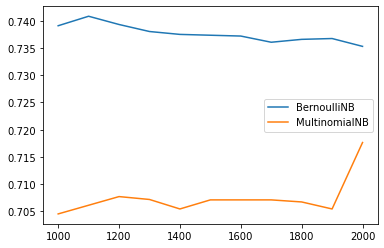

In [219]:
### learning curve for pre-processed cv after mi selection
x = range(1000,2100,100)
b = [0.7390909090909,0.740833333333,0.7393181818181,0.73803030303,0.7375,0.73734848484,0.737196969696,0.736060606060,0.736590909090,0.736742424242,0.735303030303]
m = [0.704545454545,0.706136363636,0.7077272727272,0.7071969696969,0.7054545454545,0.70712121212,0.70712121212,0.70712121212,0.7067424242424243,0.70545454545454,0.7176515151515]
plt.plot(x,b, label='BernoulliNB')
plt.plot(x,m, label='MultinomialNB')
plt.legend()

In [153]:
## preprocessed after chi2 selection

models=[BernoulliNB(),
            MultinomialNB(),
            ComplementNB()]

# title for the plots
titles = ['BernoulliNB',
            'MultinomialNB',
            'ComplementNB']

chi2_kbest(1000, 2100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)

k is 1000
BernoulliNB Accuracy: 0.7315909090909091 

MultinomialNB Accuracy: 0.7021969696969697 

ComplementNB Accuracy: 0.7078030303030303 

k is 1100
BernoulliNB Accuracy: 0.7337121212121213 

MultinomialNB Accuracy: 0.7034848484848485 

ComplementNB Accuracy: 0.7085606060606061 

k is 1200
BernoulliNB Accuracy: 0.7345454545454545 

MultinomialNB Accuracy: 0.7047727272727272 

ComplementNB Accuracy: 0.7099242424242425 

k is 1300
BernoulliNB Accuracy: 0.7349242424242424 

MultinomialNB Accuracy: 0.7059848484848484 

ComplementNB Accuracy: 0.7112878787878788 

k is 1400
BernoulliNB Accuracy: 0.7328787878787879 

MultinomialNB Accuracy: 0.7063636363636364 

ComplementNB Accuracy: 0.7132575757575758 

k is 1500
BernoulliNB Accuracy: 0.7313636363636363 

MultinomialNB Accuracy: 0.7053030303030303 

ComplementNB Accuracy: 0.714469696969697 

k is 1600
BernoulliNB Accuracy: 0.7307575757575757 

MultinomialNB Accuracy: 0.7053030303030303 

ComplementNB Accuracy: 0.7148484848484848 

k is 17

[0.7315909090909091,
 0.7021969696969697,
 0.7078030303030303,
 0.7337121212121213,
 0.7034848484848485,
 0.7085606060606061,
 0.7345454545454545,
 0.7047727272727272,
 0.7099242424242425,
 0.7349242424242424,
 0.7059848484848484,
 0.7112878787878788,
 0.7328787878787879,
 0.7063636363636364,
 0.7132575757575758,
 0.7313636363636363,
 0.7053030303030303,
 0.714469696969697,
 0.7307575757575757,
 0.7053030303030303,
 0.7148484848484848,
 0.7298484848484849,
 0.7065151515151515,
 0.7153787878787878,
 0.7302272727272727,
 0.7079545454545455,
 0.7165151515151515,
 0.7304545454545455,
 0.7071969696969697,
 0.7166666666666667,
 0.7287878787878788,
 0.7071212121212122,
 0.7172727272727273]

In [154]:
#### NB tuning alpha--choose best model--tiidf 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB,CategoricalNB,ComplementNB
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
alpha_space = np.arange(1.0e-2, 1, 0.01)
param_grid = {'alpha': alpha_space}
  
# Instantiating logistic regression classifier
bnb = BernoulliNB()
  
# Instantiating the GridSearchCV object
bnb_cv = GridSearchCV(bnb, param_grid, cv = 5)
  
bnb_cv.fit(train_tfidf_text, y_train)
  
# Print the tuned parameters and score
print("Tuned NB Parameters: {}".format(bnb_cv.best_params_)) 
print("Best score is {}".format(bnb_cv.best_score_))

Tuned NB Parameters: {'alpha': 0.87}
Best score is 0.7494029850746269


In [155]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.63)
evaluation_model_micro(bnb, cv_train_tfidf, cv_test_tfidf, cv_train_tfidf_labels, cv_test_tfidf_labels)

The 1 round!
F1 score is 0.748875
Precision is 0.748875
Recall is 0.748875
Confusion matrix is

[[2705  793   43]
 [ 889 3039  122]
 [  79   83  247]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.74      0.76      0.75      3541
         2.0       0.78      0.75      0.76      4050
         3.0       0.60      0.60      0.60       409

    accuracy                           0.75      8000
   macro avg       0.70      0.71      0.70      8000
weighted avg       0.75      0.75      0.75      8000

The 2 round!
F1 score is 0.755
Precision is 0.755
Recall is 0.755
Confusion matrix is

[[2756  745   40]
 [ 900 3034  115]
 [  85   75  250]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.74      0.78      0.76      3541
         2.0       0.79      0.75      0.77      4049
         3.0       0.62      0.61      0.61       410

    accuracy                           0.76      8000
  

In [156]:
evaluation_model_macro(bnb, cv_train_tfidf, cv_test_tfidf, cv_train_tfidf_labels, cv_test_tfidf_labels)

The 1 round!
F1 score is 0.7049081466935497
Precision is 0.7040716625188396
Recall is 0.7060636170780258
Confusion matrix is

[[2705  793   43]
 [ 889 3039  122]
 [  79   83  247]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.74      0.76      0.75      3541
         2.0       0.78      0.75      0.76      4050
         3.0       0.60      0.60      0.60       409

    accuracy                           0.75      8000
   macro avg       0.70      0.71      0.70      8000
weighted avg       0.75      0.75      0.75      8000

The 2 round!
F1 score is 0.7127471776764915
Precision is 0.7137398033013231
Recall is 0.712462709679563
Confusion matrix is

[[2756  745   40]
 [ 900 3034  115]
 [  85   75  250]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.74      0.78      0.76      3541
         2.0       0.79      0.75      0.77      4049
         3.0       0.62      0.61      0.61

### 2. SVM

In [15]:
from sklearn.svm import SVC
### hyperparameters
C=100

### tfidf-nonpreprocessed
models = (svm.SVC(kernel='poly',gamma=0.8, C=C),
          svm.SVC(kernel='rbf', gamma=0.8, C=C))  ###radial basis Gamma越大越fit

models = (clf.fit(x_train_tfidf_all, y_train) for clf in models)

# title for the plots
titles = ('SVC with poly kernel',
          'SVC with RBF kernel')

for title, model in zip(titles, models):
    acc = model.score(x_test_tfidf_all,y_test)
    print(title, acc)

SVC with poly kernel 0.7623484848484848
SVC with RBF kernel 0.78


In [16]:
### tfidf-preprocessed-----
models = (svm.SVC(kernel='poly', gamma=0.8, C=C),
          svm.SVC(kernel='rbf', gamma=0.8, C=C))  ###radial basis Gamma larger, fit better

models = (clf.fit(cv_train_tfidf_all, y_train) for clf in models)

# title for the plots
titles = ('SVC with poly kernel',
          'SVC with RBF kernel')

for title, model in zip(titles, models):
    acc = model.score(cv_test_tfidf_all,y_test)
    print(title, acc)

SVC with poly kernel 0.7609848484848485
SVC with RBF kernel 0.7857575757575758


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(text_train_cv)
X_test = sc.transform(text_test_cv)  
### mi selected preprocessed cv
models = (svm.SVC(kernel='poly', gamma=0.8, C=C,class_weight='balanced',max_iter=1000),
          svm.SVC(kernel='rbf', gamma=0.8, C=C,class_weight='balanced',max_iter=1000))  

# title for the plots
titles = ('SVC with poly kernel',
          'SVC with RBF kernel')

mi_kbest(1000, 2100, 100, models, titles, X_train, y_train, X_test, y_test)


k is 1000


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.4762878787878788 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.5189393939393939 

k is 1100


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.48159090909090907 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.516439393939394 

k is 1200


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.47689393939393937 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.5150757575757576 

k is 1300


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.45901515151515154 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.5140151515151515 

k is 1400


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.47106060606060607 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.5131060606060606 

k is 1500


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.4821212121212121 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.511969696969697 

k is 1600


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.48787878787878786 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.10886363636363636 

k is 1700


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.4965909090909091 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.09696969696969697 

k is 1800


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.5041666666666667 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.09166666666666666 

k is 1900


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.51 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.08348484848484848 

k is 2000


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.5133333333333333 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.07931818181818182 



In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(text_train_cv)
X_test = sc.transform(text_test_cv)  
### mi selected preprocessed cv-----没跑linear kernel，因为前面表现不好！
models = (svm.SVC(kernel='poly', gamma=0.8, C=C,class_weight='balanced',max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.8, C=C,class_weight='balanced',max_iter=10000))  ###radial basis Gamma越大越fit

# title for the plots
titles = ('SVC with poly kernel',
          'SVC with RBF kernel')

mi_kbest(1000, 1200, 100, models, titles, X_train, y_train, X_test, y_test)

k is 1000


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.7459090909090909 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.5225757575757576 

k is 1100


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with poly kernel Accuracy: 0.7468939393939394 



D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC with RBF kernel Accuracy: 0.5200757575757575 



In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

train_countVecs_non


# Creating the hyperparameter grid
gamma_space = [0.01,0.05,0.1,0.5,1]
param_grid = {'gamma': gamma_space}
  
# Instantiating SVM classifier
rbfsvm = svm.SVC(kernel='rbf',C=1)

svm_cv = GridSearchCV(rbfsvm, param_grid, cv = 3)
  
svm_cv.fit(cv_train_tfidf_all, y_train)
  
# Print the tuned parameters and score
print("Tuned RBF SVM Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Tuned RBF SVM Parameters: {'gamma': 0.1}
Best score is 0.7926119912339314


In [28]:
svm_cv.cv_results_

{'mean_fit_time': array([ 502.08751472,  421.95622015,  426.0600028 , 1366.83806777,
        2703.70160421]),
 'std_fit_time': array([ 15.18109751,   1.22771708,   1.94247465,  74.83123477,
        271.19791923]),
 'mean_score_time': array([216.57329933, 183.3119549 , 183.1782496 , 282.8817095 ,
        308.61148794]),
 'std_score_time': array([ 0.44310869,  1.06798266,  1.64038793, 38.85620937, 38.43224073]),
 'param_gamma': masked_array(data=[0.01, 0.05, 0.1, 0.5, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.01},
  {'gamma': 0.05},
  {'gamma': 0.1},
  {'gamma': 0.5},
  {'gamma': 1}],
 'split0_test_score': array([0.75845086, 0.78598612, 0.79124692, 0.78643385, 0.74972017]),
 'split1_test_score': array([0.76558827, 0.79805217, 0.80073883, 0.80006717, 0.75797604]),
 'split2_test_score': array([0.75875966, 0.78237994, 0.78585022, 0.784283  , 0.75540132]),
 'mean_test_score': array([0.76093293, 0.78

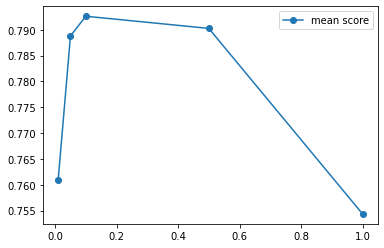

In [42]:
### learning curve for svm with different gamma
x = [0.01,0.05,0.1,0.5,1]
y=svm_cv.cv_results_['mean_test_score']

plt.plot(x, y, label='mean score', marker='o')
plt.legend()

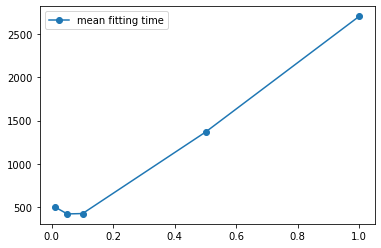

In [44]:
### learning curve of time for svm with different gamma
x = [0.01,0.05,0.1,0.5,1]
y=svm_cv.cv_results_['mean_fit_time']

plt.plot(x,y, label='mean fitting time',marker='o')
plt.legend()

In [21]:
###Evaluation for SVM --- RBF C=1, gamma=0.1
from sklearn import svm

rbfsvm = svm.SVC(kernel='rbf',C=1, gamma=0.1)
evaluation_model_micro(rbfsvm, train_countVecs, test_countVecs, train_labels, test_labels)

The 1 round!
F1 score is 0.7965
Precision is 0.7965
Recall is 0.7965
Confusion matrix is

[[2865  670    6]
 [ 734 3301   15]
 [  72  131  206]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79      3541
         2.0       0.80      0.82      0.81      4050
         3.0       0.91      0.50      0.65       409

    accuracy                           0.80      8000
   macro avg       0.83      0.71      0.75      8000
weighted avg       0.80      0.80      0.79      8000

The 2 round!
F1 score is 0.8005
Precision is 0.8005
Recall is 0.8005
Confusion matrix is

[[2878  659    4]
 [ 725 3318    6]
 [  83  119  208]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.80      3541
         2.0       0.81      0.82      0.81      4049
         3.0       0.95      0.51      0.66       410

    accuracy                           0.80      8000
   ma

In [22]:
evaluation_model_macro(rbfsvm, train_countVecs, test_countVecs, train_labels, test_labels)

The 1 round!
F1 score is 0.7507235013183432
Precision is 0.8308865612420319
Recall is 0.7092742288255813
Confusion matrix is

[[2865  670    6]
 [ 734 3301   15]
 [  72  131  206]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79      3541
         2.0       0.80      0.82      0.81      4050
         3.0       0.91      0.50      0.65       409

    accuracy                           0.80      8000
   macro avg       0.83      0.71      0.75      8000
weighted avg       0.80      0.80      0.79      8000

The 2 round!
F1 score is 0.7578703583797969
Precision is 0.8483264069230567
Recall is 0.7131811414483744
Confusion matrix is

[[2878  659    4]
 [ 725 3318    6]
 [  83  119  208]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.78      0.81      0.80      3541
         2.0       0.81      0.82      0.81      4049
         3.0       0.95      0.51      0.6

### 3. Random Forest

In [175]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Necessary imports
from scipy.stats import randint  

# Creating the hyperparameter grid 
param_dist = {"n_estimators": [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)],
              "max_depth": [int(x) for x in np.linspace(10, 40, num = 10)],
              "max_features": ['auto', 'sqrt', 'log2'],
              # Minimum number of samples required at each leaf node
              "min_samples_leaf": [1, 2, 4],
              # Minimum number of samples required to split a node
              "min_samples_split": [2, 5, 10],
              # Method of selecting samples for training each tree
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
rf = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
rf_cv = RandomizedSearchCV(rf, param_dist, cv = 5)
  
rf_cv.fit(train_tfidf_text_pre, y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))


Tuned Decision Tree Parameters: {'n_estimators': 115, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 33, 'criterion': 'gini', 'bootstrap': False}
Best score is 0.7918656716417909


In [206]:
    model = RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)
    model.fit(train_sm_text_pre.toarray(), y_train)
    results = model.predict(train_sm_text_pre.toarray())
    print(model.score(test_sm_text_pre, y_test))

0.7896212121212122


In [184]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

def chi2_kbest_new (a, b, step_size, models, titles, X_train, y_train, X_test, y_test):
    ### grid search for best K
    output = []
    for K in range(a,b,step_size):
        print('k is', K)
        x2 = SelectKBest(chi2,k=K)
        ### preprocessed count
        
        X_train_chi = x2.fit_transform(X_train,y_train)
        X_test_chi = x2.transform(X_test)
        cv_train_tfidf_name, cv_test_tfidf_name = tfidf(X_train_chi, X_test_chi)
        
        ### if there is only a model to be tested
        if len(models)==1:
            models[0].fit(cv_train_tfidf_name.toarray(),y_train)
            acc = models[0].score(cv_test_tfidf_name.toarray(), y_test)
            print(titles[0], "Accuracy:",acc, '\n')
            output.append(acc)
            
        ##else iterate each model to be tested
        else:
            for title, model in zip(titles, models):
                model.fit(cv_train_tfidf_name.toarray(),y_train)
                acc = model.score(cv_test_tfidf_name.toarray(), y_test)
                print(title, "Accuracy:",acc, '\n')
                output.append(acc)
    return output

In [176]:
model = RandomForestClassifier(n_estimators=115, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=33, criterion="gini", bootstrap=False)
model.fit(train_tfidf_text_pre.toarray(), y_train)
results = model.predict(test_tfidf_text_pre.toarray())
model.score(test_tfidf_text_pre, y_test)

0.7918181818181819

In [ ]:
chi2_kbest

In [186]:
## preprocessed after chi2 selection

models=[model]

# title for the plots
titles = ['RandomForestClassifier']


chi2_kbest(1000, 2100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)

k is 1000
RandomForestClassifier Accuracy: 0.7967424242424243 

k is 1100
RandomForestClassifier Accuracy: 0.7982575757575757 

k is 1200
RandomForestClassifier Accuracy: 0.798409090909091 

k is 1300
RandomForestClassifier Accuracy: 0.7995454545454546 

k is 1400
RandomForestClassifier Accuracy: 0.7981818181818182 

k is 1500
RandomForestClassifier Accuracy: 0.7963636363636364 

k is 1600
RandomForestClassifier Accuracy: 0.7993939393939394 

k is 1700
RandomForestClassifier Accuracy: 0.7977272727272727 

k is 1800
RandomForestClassifier Accuracy: 0.7984848484848485 

k is 1900
RandomForestClassifier Accuracy: 0.7981060606060606 

k is 2000
RandomForestClassifier Accuracy: 0.7973484848484849 



[0.7967424242424243,
 0.7982575757575757,
 0.798409090909091,
 0.7995454545454546,
 0.7981818181818182,
 0.7963636363636364,
 0.7993939393939394,
 0.7977272727272727,
 0.7984848484848485,
 0.7981060606060606,
 0.7973484848484849]

In [185]:
## preprocessed after chi2 selection

models=[model]

# title for the plots
titles = ['RandomForestClassifier']


chi2_kbest_new(1000, 2100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)

k is 1000
RandomForestClassifier Accuracy: 0.7940909090909091 

k is 1100
RandomForestClassifier Accuracy: 0.7959848484848485 

k is 1200
RandomForestClassifier Accuracy: 0.7968939393939394 

k is 1300
RandomForestClassifier Accuracy: 0.7971212121212121 

k is 1400
RandomForestClassifier Accuracy: 0.798409090909091 

k is 1500
RandomForestClassifier Accuracy: 0.7972727272727272 

k is 1600
RandomForestClassifier Accuracy: 0.7998484848484848 

k is 1700
RandomForestClassifier Accuracy: 0.7976515151515151 

k is 1800
RandomForestClassifier Accuracy: 0.798030303030303 

k is 1900
RandomForestClassifier Accuracy: 0.7967424242424243 

k is 2000
RandomForestClassifier Accuracy: 0.7971212121212121 



[0.7940909090909091,
 0.7959848484848485,
 0.7968939393939394,
 0.7971212121212121,
 0.798409090909091,
 0.7972727272727272,
 0.7998484848484848,
 0.7976515151515151,
 0.798030303030303,
 0.7967424242424243,
 0.7971212121212121]

In [172]:
evaluation_model_micro(rf, cv_train_tfidf_pre, cv_test_tfidf_pre, cv_train_tfidf_pre_labels, cv_test_tfidf_pre_labels)

The 1 round!
F1 score is 0.7932499999999999
Precision is 0.79325
Recall is 0.79325
Confusion matrix is

[[2724  812    5]
 [ 611 3427   12]
 [  81  133  195]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.80      0.77      0.78      3541
         2.0       0.78      0.85      0.81      4050
         3.0       0.92      0.48      0.63       409

    accuracy                           0.79      8000
   macro avg       0.83      0.70      0.74      8000
weighted avg       0.80      0.79      0.79      8000

The 2 round!
F1 score is 0.7984999999999999
Precision is 0.7985
Recall is 0.7985
Confusion matrix is

[[2773  763    5]
 [ 626 3421    2]
 [  94  122  194]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.78      0.79      3541
         2.0       0.79      0.84      0.82      4049
         3.0       0.97      0.47      0.64       410

    accuracy                     

In [173]:
evaluation_model_macro(rf, cv_train_tfidf_pre, cv_test_tfidf_pre, cv_train_tfidf_pre_labels, cv_test_tfidf_pre_labels)

The 1 round!
F1 score is 0.7403201328076428
Precision is 0.8333940347655008
Recall is 0.6960358212447785
Confusion matrix is

[[2732  804    5]
 [ 617 3421   12]
 [  81  135  193]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.80      0.77      0.78      3541
         2.0       0.78      0.84      0.81      4050
         3.0       0.92      0.47      0.62       409

    accuracy                           0.79      8000
   macro avg       0.83      0.70      0.74      8000
weighted avg       0.80      0.79      0.79      8000

The 2 round!
F1 score is 0.7454789017127686
Precision is 0.8482790315562753
Recall is 0.6988295779562987
Confusion matrix is

[[2793  743    5]
 [ 657 3389    3]
 [  92  125  193]]
Classification report is

              precision    recall  f1-score   support

         1.0       0.79      0.79      0.79      3541
         2.0       0.80      0.84      0.82      4049
         3.0       0.96      0.47      0.6

###  4. Logistic Regression

In [188]:
## preprocessed after chi2 selection
from sklearn.linear_model import LogisticRegression
models=[LogisticRegression(max_iter=1000)]

# title for the plots
titles = ['Logitsic Regression']

sm_pre_chi2 = chi2_kbest(1000, 1200, 20, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)


k is 1000
Logitsic Regression Accuracy: 0.7965151515151515 

k is 1020
Logitsic Regression Accuracy: 0.795 

k is 1040
Logitsic Regression Accuracy: 0.7973484848484849 

k is 1060
Logitsic Regression Accuracy: 0.7979545454545455 

k is 1080
Logitsic Regression Accuracy: 0.7971969696969697 

k is 1100
Logitsic Regression Accuracy: 0.7975 

k is 1120
Logitsic Regression Accuracy: 0.7985606060606061 

k is 1140
Logitsic Regression Accuracy: 0.7975757575757576 

k is 1160
Logitsic Regression Accuracy: 0.7959090909090909 

k is 1180
Logitsic Regression Accuracy: 0.7953030303030303 



In [ ]:
### plot learning curve
x = range(50,1100,100)
plt.plot(x, sm_pre_chi2, label='MI')
plt.plot(x, sm_pre_mi, label='CHI2')
plt.legend()

In [179]:
sm_pre_mi = mi_kbest(2000, 3100, 100, models, titles, train_sm_text_pre, y_train, test_sm_text_pre, y_test)

k is 2000
Logitsic Regression Accuracy: 0.7844696969696969 

k is 2100
Logitsic Regression Accuracy: 0.7829545454545455 

k is 2200
Logitsic Regression Accuracy: 0.7818939393939394 

k is 2300
Logitsic Regression Accuracy: 0.7825757575757576 

k is 2400
Logitsic Regression Accuracy: 0.7812878787878788 

k is 2500
Logitsic Regression Accuracy: 0.7815151515151515 

k is 2600
Logitsic Regression Accuracy: 0.7796969696969697 

k is 2700
Logitsic Regression Accuracy: 0.7788636363636363 

k is 2800
Logitsic Regression Accuracy: 0.7775 

k is 2900
Logitsic Regression Accuracy: 0.7784090909090909 

k is 3000
Logitsic Regression Accuracy: 0.7780303030303031 



In [200]:
## tfidf score for preprocessed cv 
lgr = LogisticRegression(class_weight="balanced", C=0.7, max_iter=4000, solver = "newton-cg", multi_class="auto")
lgr.fit(train_tfidf_text_pre, y_train)
print("Accuracy:",lgr.score(test_tfidf_text_pre, y_test))

Accuracy: 0.79


In [181]:
### tfidf non-preprocessed cv
lgr = LogisticRegression()
lgr.fit(train_tfidf_text,y_train)
print("Accuracy:",lgr.score(test_tfidf_text, y_test))

Accuracy: 0.7842424242424243


/Users/raphaelxu/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
evaluation_model_micro(lgr, cv_train_tfidf_pre, cv_test_tfidf_pre, cv_train_tfidf_pre_labels, cv_test_tfidf_pre_labels)

In [ ]:
evaluation_model_macro(lgr, cv_train_tfidf_pre, cv_test_tfidf_pre, cv_train_tfidf_pre_labels, cv_test_tfidf_pre_labels)

### 5. Stacking

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

X, y = load_iris(return_X_y=True)
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, stratify=y, random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

# Evaluation

In [ ]:
# 多个model 同时进行cross validation并范围对应的average accuracy
from sklearn.model_selection import cross_val_score
print(cross_val_score(zero_r, X, y, cv=10))

def avg_score(clf, X, y, cv=10):
    scores = cross_val_score(clf, X, y, cv=cv)
    return np.mean(scores)   

for clf in [zero_r, one_r, dt]:
    avg = avg_score(clf, X, y, cv=10)
    print(clf)
    print('Average CV accuracy', avg)
    print()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#print(cross_val_score(zero_r, X, y, cv=10))
X = iris.data
y = iris.target

#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter
models = [DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C)]

titles = ['1-R',
          '1-Nearest Neighbour',
          '5-Nearest Neighbour',
          'Decision Tree',
          'LinearSVC',
          'SVM with a cubic kernel',
          'SVM with an RBF kernel']

title_training_acc = {}
for title, model in zip(titles, models):
    model.fit(X, y)
    title_training_acc[title] = model.score(X, y)

title_crossvalidation_acc = {}
for title, model in zip(titles, models):
    title_crossvalidation_acc[title] = np.mean(cross_val_score(model, X, y, cv=10))

for title in titles:
    print(title, ': Training Acc', title_training_acc[title], '; X-Val Acc', title_crossvalidation_acc[title])
    